C:\Users\abirm\AppData\Local\Temp\ipykernel_26496\1689623034.py:31: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  image = Image.fromarray(image, 'RGB') # convertit ce tableau en objet PIL


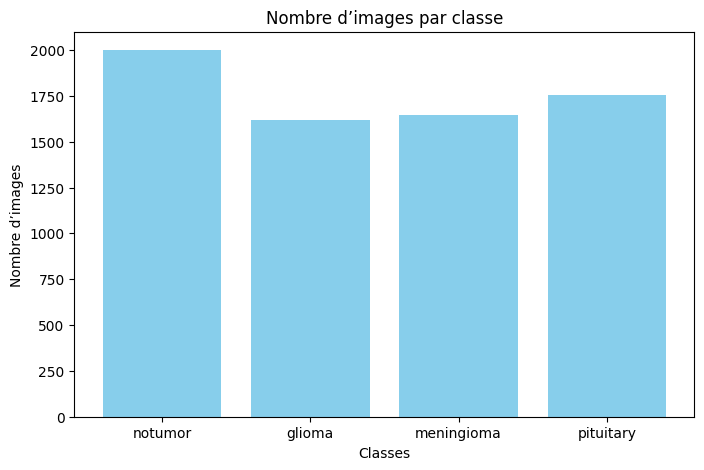

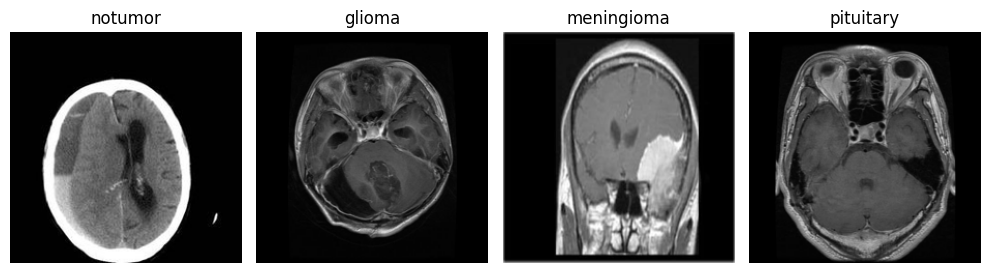

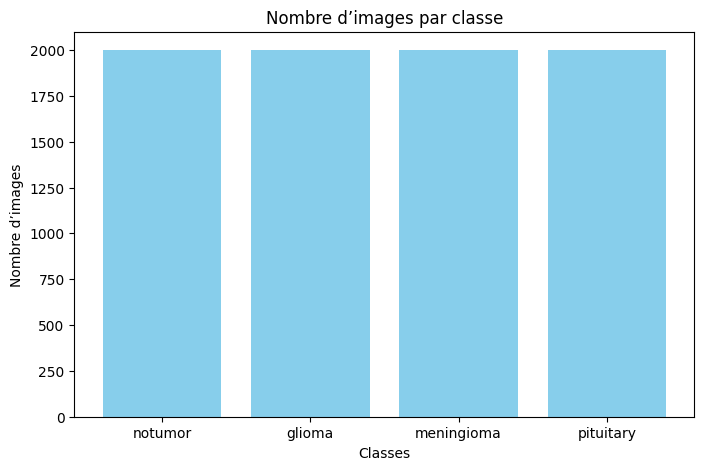

c:\Users\abirm\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

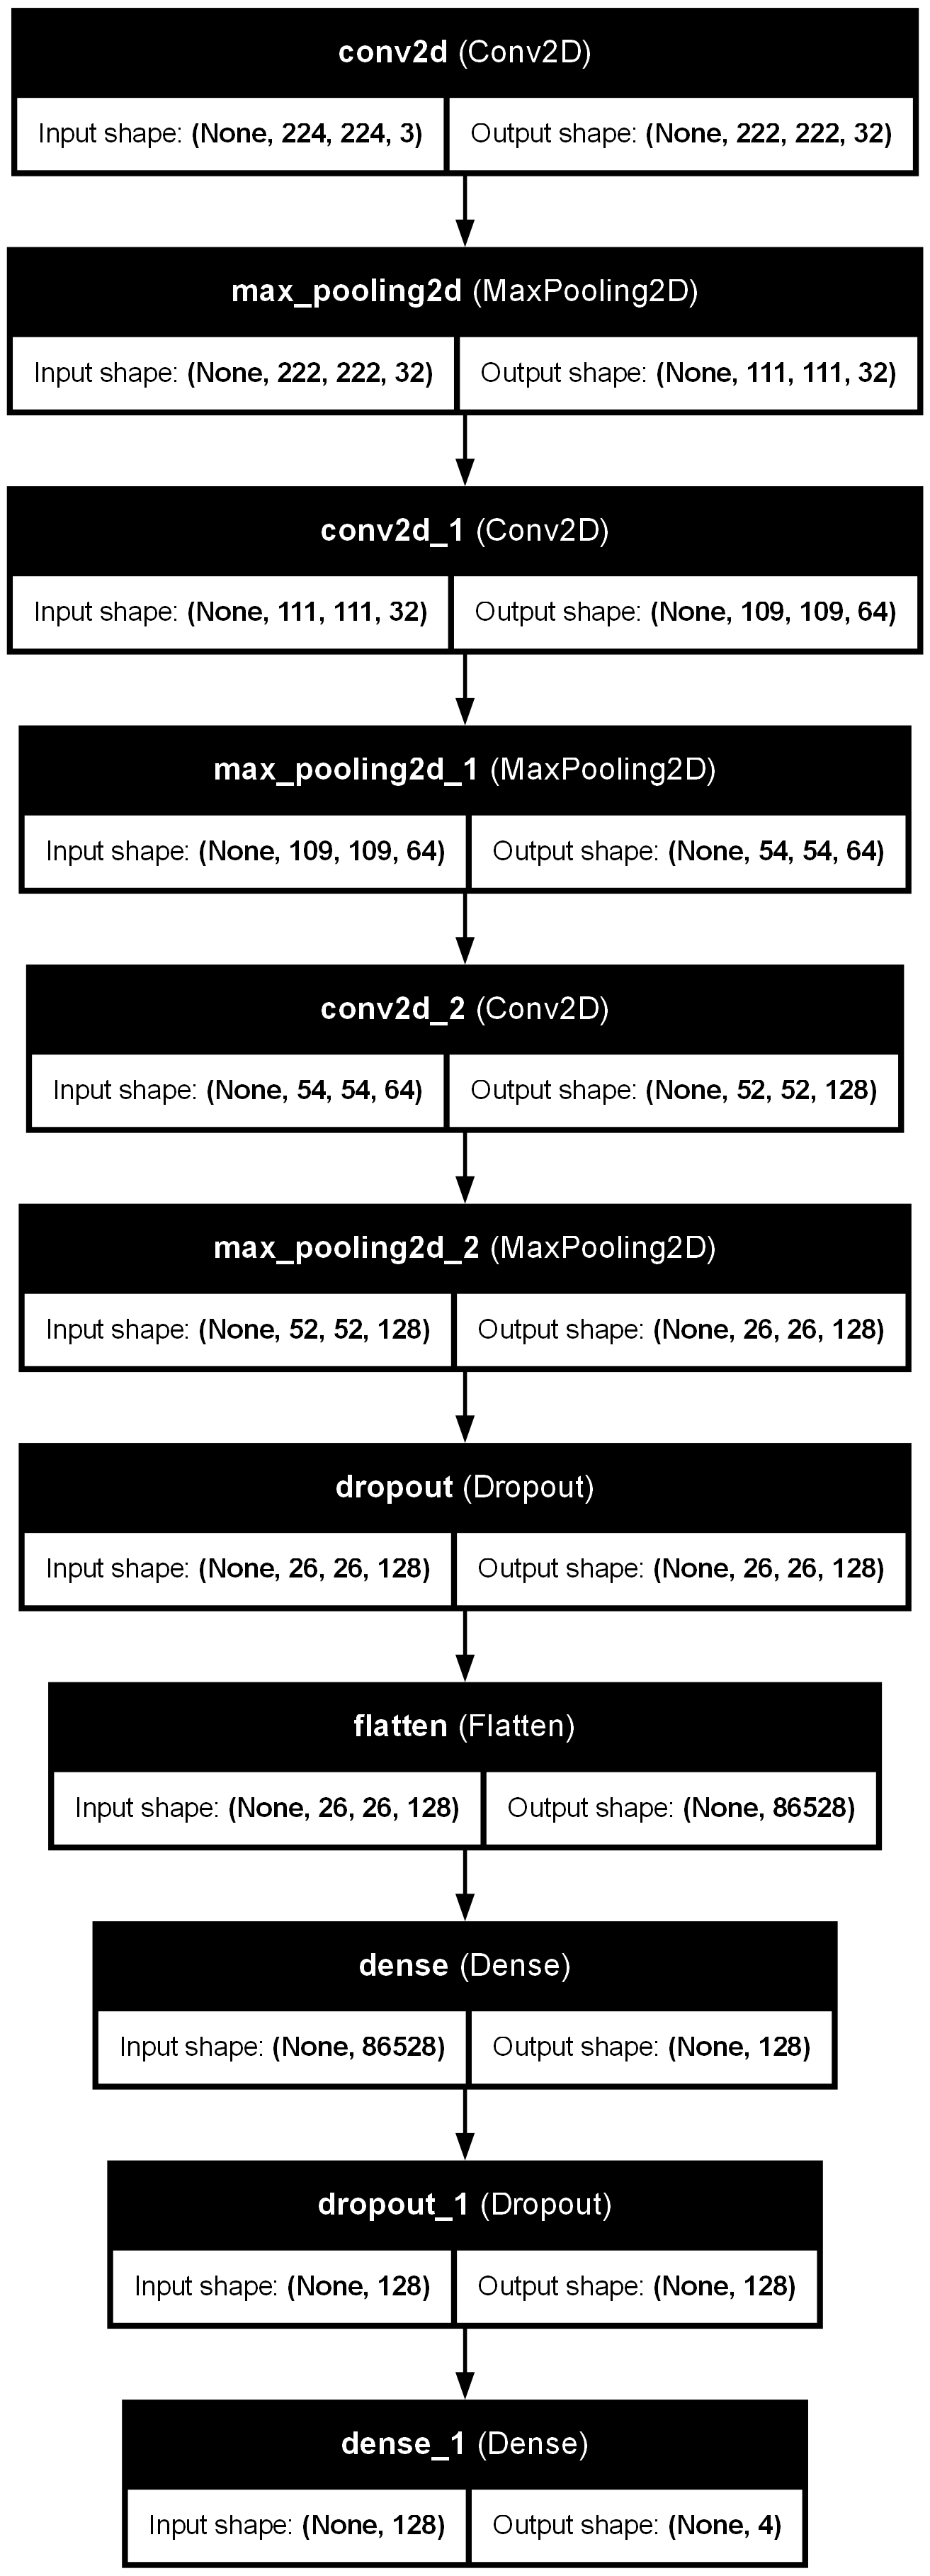

In [6]:
import os 
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D, Activation , Dropout, Flatten , Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam


image_directory = 'Data/'
folders = {
    'notumor': 0,
    'glioma': 1,
    'meningioma': 2,
    'pituitary': 3
}
dataset = []
label = []

for folder_name, folder_label in folders.items():
    images = os.listdir(image_directory + folder_name + '/')
    for image_name in images:
        ext = image_name.split('.')[-1].lower()
        if ext in ['jpg', 'jpeg', 'bmp', 'png']:
            image = cv2.imread(image_directory + folder_name + '/' + image_name) # lit l’image depuis le disque en tableau NumPy
            image = Image.fromarray(image, 'RGB') # convertit ce tableau en objet PIL
            image = image.resize((224, 224)) # Redimensionner les images à une taille fixe 224×224 à l’aide de la bibliothèque OpenCV.
            dataset.append(np.array(image)) # retransforme en tableau NumPy pour ML 
            label.append(folder_label) #Chaque image et son label doivent avoir le même indice dans les deux listes.
            
#Une fois toutes les images et leurs labels chargés, convertir les listes images et étiquettes en tableaux NumPy pour les rendre exploitables par le modèle CNN.
dataset = np.array(dataset)
label = np.array(label)



#Afficher graphiquement le nombre d’images dans chaque classe.
classes, counts = np.unique(label, return_counts=True) # compter combien d’images pour chaque classe
class_names = list(folders.keys())
plt.figure(figsize=(8,5))
plt.bar(class_names, counts, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Nombre d’images')
plt.title('Nombre d’images par classe')
plt.show()





# Montrer un échantillon d’images pour chaque classe.
class_names = list(folders.keys()) # Récupérer les noms des classes dans l’ordre de leur label
plt.figure(figsize=(10, 6)) # Définir la taille du graphique (1 ligne, 4 colonnes)
for i, class_name in enumerate(class_names): # Afficher 1 image par classe
    class_indices = np.where(label == i)[0] # Trouver les indices des images appartenant à cette classe
    image = dataset[class_indices[0]] # Récupérer l'image correspondante
    # Créer un sous-graphique
    plt.subplot(1, len(class_names), i + 1)
    plt.imshow(image)
    plt.title(class_name)
    plt.axis('off')
plt.tight_layout()
plt.show()




#Vérifier l’équilibre entre les classes et appliquer un rééquilibrage si nécessaire.
# classes, counts = np.unique(label, return_counts=True)
inverse_folders = {v: k for k, v in folders.items()}
# for c, count in zip(classes, counts):
#     print(f"Classe {inverse_folders[c]}: {count} images")

# Classe notumor: 2000 images
# Classe glioma: 1621 images
# Classe meningioma: 1645 images
# Classe pituitary: 1757 images


#utilisation de data augmentaion



train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Calculer le nombre d'images à générer pour chaque classe
max_count = 2000

augmented_dataset = list(dataset)
augmented_labels = list(label)

# Pour chaque classe, générer des images augmentées
for class_label in classes:
    # Trouver les images de cette classe
    class_indices = np.where(label == class_label)[0]
    class_images = dataset[class_indices]
    current_count = len(class_images)
    # Calculer combien d'images à générer
    images_to_generate = max_count - current_count
    if images_to_generate > 0:
        generated = 0
        while generated < images_to_generate:
            random_image = class_images[np.random.randint(0, len(class_images))] # Choisir une image au hasard dans cette classe
            random_image = np.expand_dims(random_image, axis=0) # Ajouter une dimension batch (le générateur attend format (batch, height, width, channels))
            augmented_image = train_datagen.random_transform(random_image[0]) # Générer une image augmentée
            augmented_dataset.append(augmented_image) # Ajouter au dataset augmenté
            augmented_labels.append(class_label)
            generated += 1
# Convertir en arrays NumPy
augmented_dataset = np.array(augmented_dataset)
augmented_labels = np.array(augmented_labels)



classes, counts = np.unique(augmented_labels, return_counts=True) # compter combien d’images pour chaque classe
class_names = list(folders.keys())
plt.figure(figsize=(8,5))
plt.bar(class_names, counts, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Nombre d’images')
plt.title('Nombre d’images par classe')
plt.show()


x = augmented_dataset/255.0 # normalisation
y = augmented_labels

y = to_categorical(y, num_classes=4) # to_categorical 



from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=1)


# model building

model = Sequential()
#couvhe 1
model.add(Conv2D(32 , (3 ,3) , input_shape = (224 , 224 ,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

# couvhe 2
model.add(Conv2D(64 , (3 ,3) , activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#couvhe 3
model.add(Conv2D(128 , (3 ,3) , activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Évite le surapprentissage (overfitting) en désactivant aléatoirement certains neurones
model.add(Dropout(0.5))

model.add(Flatten()) # Transforme l’image (2D) en un vecteur (1D)
model.add(Dense(128, activation='relu'))  # Couche cachée
model.add(Dropout(0.5))

# dense Combine toutes les caractéristiques pour faire une prédiction finale
model.add(Dense(4, activation='softmax')) # 4 classes

optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer, # méthode d’apprentissage
    loss='categorical_crossentropy', # mesure l’erreur
    metrics=['accuracy'] # affiche la précision
)

model.summary()
plot_model(model, to_file='cnn_architecture.png', show_shapes=True, show_layer_names=True)


















In [ ]:
# test_loss, test_acc = model.evaluate(x_test, y_test)
# print("Test Accuracy:", test_acc)
# print("Test Loss:", test_loss)


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.2288 - loss: 1.3878
Test Accuracy: 0.22875000536441803
Test Loss: 1.3877596855163574


In [ ]:
# import matplotlib.pyplot as plt

# plt.plot(history.history['accuracy'], label='train acc')
# plt.plot(history.history['val_accuracy'], label='val acc')
# plt.title('Accuracy au fil des époques')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# plt.plot(history.history['loss'], label='train loss')
# plt.plot(history.history['val_loss'], label='val loss')
# plt.title('Loss au fil des époques')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()


NameError: name 'history' is not defined

In [13]:
batch_size = 64
epochs = 30


from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='max')

import time
start_time = time.time()

history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    callbacks=[early_stop , checkpoint]
)
end_time = time.time()  # Fin de l'entraînement
training_time = end_time - start_time
print("training time: " , training_time)




Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.9671 - loss: 0.0879

100/100 ━━━━━━━━━━━━━━━━━━━━ 59s 587ms/step - accuracy: 0.9652 - loss: 0.0924 - val_accuracy: 0.9206 - val_loss: 0.2861
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.9698 - loss: 0.0816

100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 470ms/step - accuracy: 0.9678 - loss: 0.0910 - val_accuracy: 0.9131 - val_loss: 0.3037
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.9742 - loss: 0.0771

100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 469ms/step - accuracy: 0.9714 - loss: 0.0813 - val_accuracy: 0.9087 - val_loss: 0.3702
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 60s 605ms/step - accuracy: 0.9711 - loss: 0.0698 - val_accuracy: 0.9250 - val_loss: 0.3178
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 84s 844ms/step - accuracy: 0.9766 - loss: 0.0604 - val_accuracy: 0.9194 - val_loss: 0.3276
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 792ms/step - accuracy: 0.9782 - loss: 0.0603

100/100 ━━━━━━━━━━━━━━━━━━━━ 85s 848ms/step - accuracy: 0.9791 - loss: 0.0584 - val_accuracy: 0.9100 - val_loss: 0.4051
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 54s 532ms/step - accuracy: 0.9780 - loss: 0.0571 - val_accuracy: 0.9181 - val_loss: 0.3260
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 475ms/step - accuracy: 0.9800 - loss: 0.0585 - val_accuracy: 0.9100 - val_loss: 0.3874
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 68s 684ms/step - accuracy: 0.9852 - loss: 0.0419 - val_accuracy: 0.9156 - val_loss: 0.4043
Epoch 10/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.9806 - loss: 0.0541 - val_accuracy: 0.9275 - val_loss: 0.3634
Epoch 11/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.9850 - loss: 0.0437 - val_accuracy: 0.9256 - val_loss: 0.3355
training time:  814.0421855449677


In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.9206 - loss: 0.2861
Test Accuracy: 0.9206249713897705
Test Loss: 0.2861359417438507


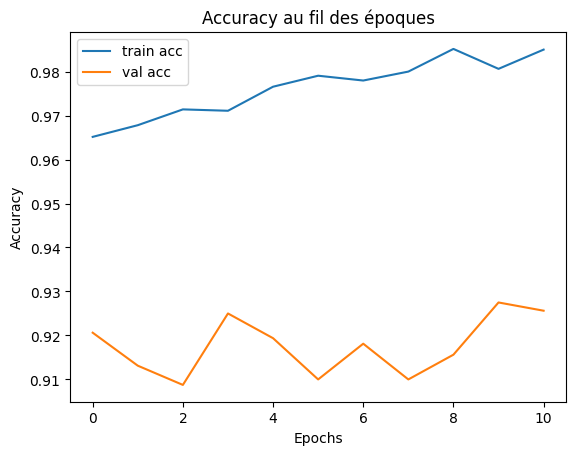

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy au fil des époques')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




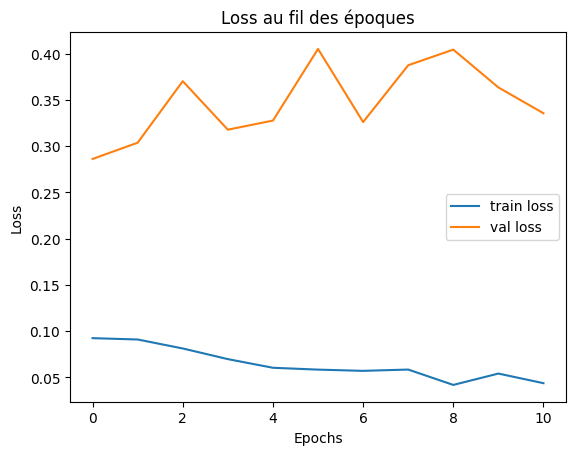

In [16]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss au fil des époques')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step


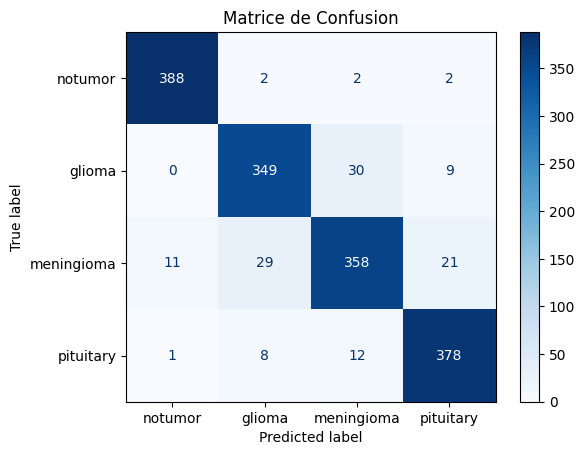

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred_probs = model.predict(x_test)  # prédictions probabilités
y_pred = np.argmax(y_pred_probs, axis=1)  # classes prédites

y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de Confusion")
plt.show()

50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step


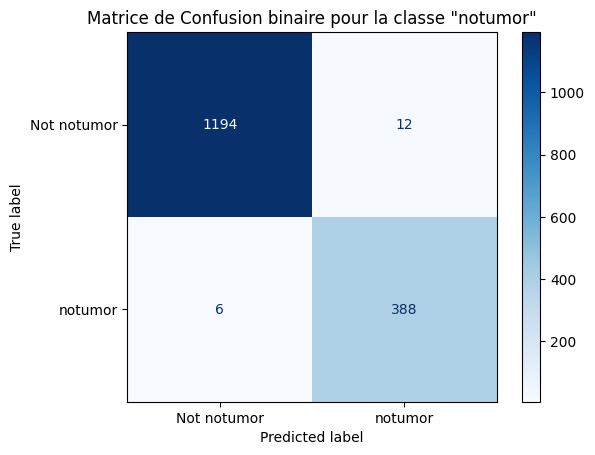

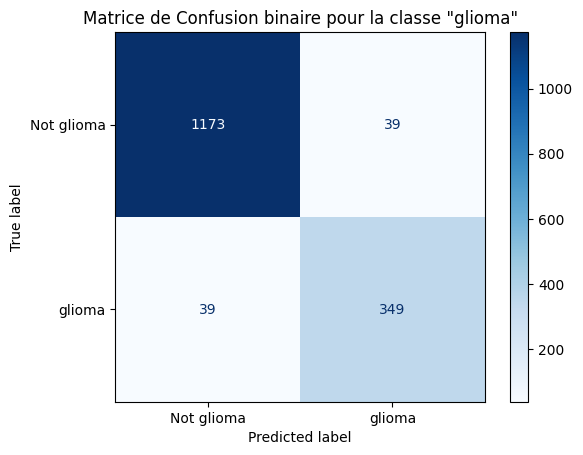

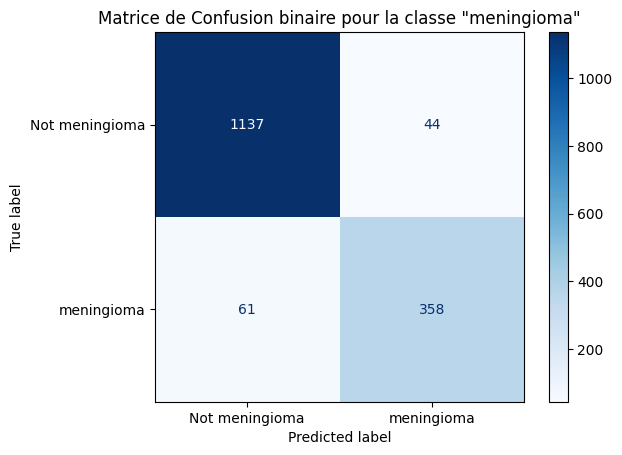

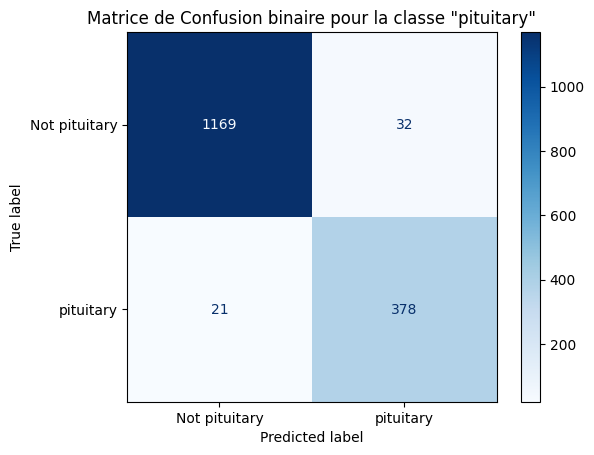

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Prédictions du modèle
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Afficher 4 matrices de confusion binaires (1 par classe)
for i, class_name in enumerate(class_names):
    # Binariser les vraies étiquettes et les prédictions pour la classe i
    y_true_binary = (y_true == i).astype(int)
    y_pred_binary = (y_pred == i).astype(int)
    
    # Calcul matrice de confusion binaire
    cm = confusion_matrix(y_true_binary, y_pred_binary)
    
    # Affichage
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f'Not {class_name}', class_name])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Matrice de Confusion binaire pour la classe "{class_name}"')
    plt.show()


In [19]:
from sklearn.metrics import classification_report
import numpy as np

# 1️⃣ Prédire les classes sur le jeu de test
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1) # convertir les probabilités en classes
y_true = np.argmax(y_test, axis=1) # si tes labels sont one-hot encodés

# 2️⃣ Générer le rapport
print(classification_report(y_true, y_pred_classes, target_names=class_names))


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step
              precision    recall  f1-score   support

     notumor       0.97      0.98      0.98       394
      glioma       0.90      0.90      0.90       388
  meningioma       0.89      0.85      0.87       419
   pituitary       0.92      0.95      0.93       399

    accuracy                           0.92      1600
   macro avg       0.92      0.92      0.92      1600
weighted avg       0.92      0.92      0.92      1600



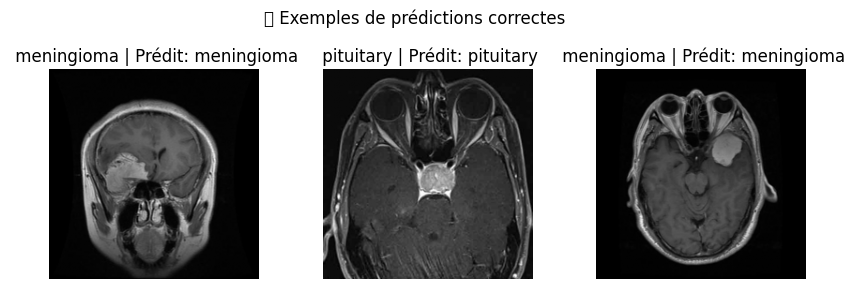

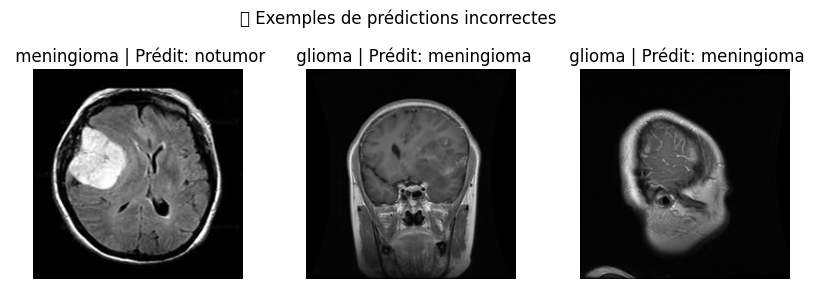

In [27]:
import numpy as np
correct_indices = np.where(y_pred_classes == y_true)[0]
incorrect_indices = np.where(y_pred_classes != y_true)[0]
plt.figure(figsize=(10, 6))
for i, idx in enumerate(correct_indices[:3]):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_test[idx])
    plt.title(f" {class_names[y_true[idx]]} | Prédit: {class_names[y_pred_classes[idx]]}")
    plt.axis("off")
plt.suptitle("✅ Exemples de prédictions correctes")
plt.show()
plt.figure(figsize=(10, 6))
for i, idx in enumerate(incorrect_indices[:3]):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_test[idx])
    plt.title(f" {class_names[y_true[idx]]} | Prédit: {class_names[y_pred_classes[idx]]}")
    plt.axis("off")
plt.suptitle("✅ Exemples de prédictions incorrectes")
plt.show()

